In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
wiki_df = first_table

In [4]:
wiki_df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [5]:
symb = wiki_df['Symbol'].tolist()
name = wiki_df['Security'].tolist()

comp_dict ={}
for s, n in zip(symb, name):
    comp_dict[s] = n

In [6]:
ds = '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/'

df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/A.csv')
df_open = df[['Date']]

import os

directory_in_str= '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020'
directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        df = pd.read_csv(directory_in_str + '/' + filename)
        df_new = df[['Open']]
        df_open[filename.split('.')[0]] = df_new
        
        continue
    else:
        continue

In [7]:
ds = '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/'

df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/A.csv')
df_close = df[['Date']]

import os

directory_in_str= '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020'
directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        df = pd.read_csv(directory_in_str + '/' + filename)
        df_new = df[['Close']]
        df_close[filename.split('.')[0]] = df_new
        
        continue
    else:
        continue

In [8]:
df_open.shape

(232, 504)

In [9]:
df_close.shape

(232, 504)

In [10]:
df_open = df_open.set_index('Date')
df_open.head()

,MMM,ATVI,ACN,ABT,ABMD,ABBV,ADBE,AAP,AMD,AES,A,AFL,AKAM,APD,ALK,ARE,ALXN,ALB,ALLE,ALGN,LNT,ALL,GOOG,GOOGL,MO,ANTM,AON,AOS,APA,AEP,AEE,AMCR,AAL,AMZN,AIV,AAPL,AMAT,APTV,AIG,AMT,...,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNT,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,171.301516,59.518558,207.528501,84.724263,172.509995,84.407261,330.000000,159.206482,46.860001,19.306760,85.348519,51.606068,86.839996,231.351321,67.765700,158.665162,109.360001,72.474143,123.643650,281.200012,53.174875,110.567450,1341.550049,1348.410034,46.859063,299.526010,207.289010,46.935032,25.315379,91.505952,75.506728,10.415751,28.873297,1875.000000,46.260238,72.829608,61.174736,95.696610,49.921638,226.671924,...,55.122082,194.910004,148.545823,58.807853,220.240005,97.599842,41.241502,20.100000,187.843750,32.500000,62.894306,143.405686,69.089244,78.013937,117.335743,56.772523,145.289993,112.471898,234.929993,89.961905,51.768753,78.327916,149.780504,63.369900,26.107388,42.931343,29.847693,144.024355,22.443279,200.676879,140.877836,62.332174,35.526182,97.653092,78.126637,98.995129,259.029999,149.033975,50.453097,131.297809
2020-01-03,170.665226,57.650838,205.205766,84.419081,166.830002,83.545006,329.170013,156.785694,48.029999,19.229416,84.126403,51.392013,86.440002,224.860685,66.423315,155.304346,106.360001,70.413320,122.692475,279.100006,52.192677,109.461469,1347.859985,1348.000000,45.906757,290.629401,205.119014,46.200300,25.325228,90.324610,74.427208,10.013671,28.165913,1864.500000,45.114695,73.053317,59.882173,94.010896,49.525284,224.579685,...,53.287843,193.199997,149.262295,58.050960,216.160004,96.845830,40.772518,20.330000,187.257356,28.270000,61.348339,139.805729,67.955804,79.135791,116.753313,56.063827,146.399994,111.545231,231.539993,88.258091,51.057357,75.990197,149.232234,63.063906,25.098409,41.506115,28.820167,141.809922,21.862038,199.845970,139.677919,61.086511,34.769489,99.031961,77.998323,99.505310,256.100006,146.490121,49.537696,131.725344
2020-01-06,170.790564,58.087968,204.979441,84.291097,166.529999,83.592377,328.290009,156.497985,48.020000,19.094068,83.460716,51.226611,86.650002,221.418695,65.717308,156.813280,105.650002,70.009036,121.037818,276.679993,52.319093,109.950842,1350.000000,1351.630005,46.336229,292.677880,205.336994,46.170910,25.551787,90.392386,74.662750,10.032818,27.089889,1860.000000,45.911203,72.227286,59.053351,92.943611,49.428609,225.487657,...,54.323760,199.990005,151.093239,57.591078,217.729996,96.943754,40.538027,20.200001,186.849870,28.290001,62.036477,140.626587,68.244136,78.927315,115.894464,56.542677,145.539993,112.974658,229.669998,88.929873,50.701658,78.327925,150.877062,62.145930,25.146916,41.525511,28.948607,139.885629,22.180782,201.824351,138.041645,61.557308,34.568344,96.362867,78.817500,99.515128,252.619995,147.632884,49.219717,133.017950
2020-01-07,171.879989,59.299993,199.989500,84.438760,178.830002,84.265137,334.149994,155.664606,49.349998,19.355101,83.420963,51.323912,88.959999,221.674390,66.184663,153.334876,104.949997,70.649970,122.167337,285.920013,52.173231,110.283616,1397.939941,1400.459961,46.270881,296.092063,203.593097,46.435416,29.482074,90.324605,74.466461,9.917938,27.458526,1904.500000,46.054400,73.714658,59.467768,92.095771,49.641287,224.155347,...,54.494834,203.339996,152.486372,57.581491,224.259995,97.110221,40.919078,20.910000,188.430148,26.799999,62.837742,139.944157,68.423102,79.413781,115.756274,56.715066,145.990005,113.891467,226.289993,88.491753,50.999675,78.709590,151.315677,64.366838,25.030495,40.497796,28.948607,142.390132,22.368279,202.437650,139.648165,60.959005,34.530032,96.737128,78.866848,99.829089,257.500000,147.612995,48.940279,132.242379
2020-01-08,171.610054,59.607969,200.776897,84.901481,178.380005,84.473601,333.809998,153.630752,47.849998,19.471115,85.408129,51.022287,90.540001,223.936290,65.657649,

In [11]:
df_close = df_close.set_index('Date')
df_close.head()

,MMM,ATVI,ACN,ABT,ABMD,ABBV,ADBE,AAP,AMD,AES,A,AFL,AKAM,APD,ALK,ARE,ALXN,ALB,ALLE,ALGN,LNT,ALL,GOOG,GOOGL,MO,ANTM,AON,AOS,APA,AEP,AEE,AMCR,AAL,AMZN,AIV,AAPL,AMAT,APTV,AIG,AMT,...,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNT,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,173.538239,58.266792,206.829712,85.600449,168.809998,84.852608,334.429993,158.154831,49.099998,19.364769,85.398193,51.907684,87.639999,227.309433,67.785583,156.509521,107.839996,71.596565,124.238136,283.679993,52.153778,110.420639,1367.369995,1368.680054,45.981449,297.744690,206.882751,46.797882,24.980467,90.498901,74.633308,10.176418,28.982893,1898.010010,45.266834,73.840042,61.372074,96.065666,50.037643,225.507385,...,53.591969,196.729996,150.376770,58.491680,219.449997,98.148216,41.124256,20.650000,189.950775,28.280001,61.744259,141.150757,68.562302,80.366859,117.414719,56.580986,148.199997,112.600060,235.059998,88.277550,51.672619,76.467285,151.265854,64.771545,25.408863,42.126625,29.037527,143.550522,22.021412,202.071640,142.405029,61.184597,35.372929,100.115349,78.807625,100.241150,259.140015,148.258896,50.530182,133.375900
2020-01-03,172.043884,58.286655,206.485229,84.556908,166.820007,84.047203,331.809998,158.164749,48.599998,19.142405,84.027046,51.547688,87.239998,222.254608,66.542633,157.401199,106.410004,70.571083,122.702377,280.440002,52.319099,110.430420,1360.660034,1361.520020,46.336231,293.796173,206.070251,46.386433,25.305529,90.402077,74.662743,10.042391,27.548195,1874.969971,45.982803,73.122154,60.395252,93.861275,49.650959,225.615936,...,54.238224,200.880005,151.839554,57.868923,217.979996,97.531288,40.498943,20.200001,188.440079,27.850000,62.225014,140.537598,68.651772,79.751328,116.378189,56.580986,146.500000,113.694313,231.009995,88.832520,51.355373,77.812668,151.664612,63.774597,25.321548,41.380074,29.086929,141.104019,22.115158,202.121109,140.292755,61.478848,34.913166,97.810677,79.271484,99.927193,256.049988,147.871353,49.817135,133.395782
2020-01-06,172.207794,59.349670,205.136902,84.999916,179.039993,84.710480,333.709991,155.565384,48.389999,19.364769,84.275452,51.401745,87.550003,222.156265,66.224434,157.783325,106.580002,70.492195,122.474495,285.880005,52.270470,110.753410,1394.209961,1397.810059,46.522957,297.329071,206.664764,46.680328,25.256275,90.702248,74.731445,9.975379,27.219410,1902.880005,46.269188,73.704819,59.092819,92.115715,49.689625,225.556747,...,54.798950,202.740005,152.187836,57.744373,224.029999,97.149391,41.094948,20.870001,188.032593,26.760000,63.035702,140.290329,68.552345,79.423714,116.141258,57.069412,145.649994,114.285797,228.880005,88.900665,51.047741,78.995850,151.744339,62.550629,25.079004,40.749874,29.027647,142.428818,22.405777,202.368408,140.015091,61.390568,34.386356,95.771927,78.758286,99.868332,258.010010,147.016785,49.210079,132.371658
2020-01-07,171.513626,59.945747,200.707962,84.527367,180.350006,84.227234,333.390015,153.720047,48.250000,19.432444,84.533775,50.915268,90.199997,223.100357,65.806808,152.619583,106.849998,71.419083,121.008080,283.059998,52.319099,109.804039,1393.339966,1395.109985,46.280216,296.428528,204.910950,46.366840,32.023460,90.721619,75.006218,9.889218,27.119778,1906.859985,45.669567,73.358185,60.799797,90.958664,49.409275,220.750519,...,54.342773,203.210007,153.461548,57.102444,223.789993,96.669571,41.163342,21.170000,187.535660,28.010000,62.272141,138.707901,67.299622,79.393929,115.065247,56.782104,145.699997,114.364662,231.979996,88.559906,50.624748,78.480591,151.355560,66.785164,25.195425,40.294193,28.839928,142.477158,22.405777,201.952957,140.679504,61.263062,34.434250,97.958405,78.462196,100.044937,256.470001,146.887604,48.911369,132.819077
2020-01-08,174.145645,59.488754,201.101685,84.871948,178.690002,84.824188,337.869995,151.954056,47.830002,19.393772,85.368385,51.070938,91.400002,224.309982,66.12500

In [12]:
df_movements = df_close - df_open
df_movements.head()

,MMM,ATVI,ACN,ABT,ABMD,ABBV,ADBE,AAP,AMD,AES,A,AFL,AKAM,APD,ALK,ARE,ALXN,ALB,ALLE,ALGN,LNT,ALL,GOOG,GOOGL,MO,ANTM,AON,AOS,APA,AEP,AEE,AMCR,AAL,AMZN,AIV,AAPL,AMAT,APTV,AIG,AMT,...,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNT,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2.236722,-1.251766,-0.698789,0.876186,-3.699997,0.445347,4.429993,-1.051651,2.239998,0.058009,0.049674,0.301617,0.800003,-4.041888,0.019884,-2.155641,-1.520004,-0.877577,0.594487,2.479980,-1.021097,-0.146811,25.819946,20.270020,-0.877614,-1.781321,-0.406258,-0.137150,-0.334912,-1.007051,-0.873420,-0.239333,0.109596,23.010010,-0.993404,1.010434,0.197339,0.369056,0.116006,-1.164539,...,-1.530114,1.819992,1.830947,-0.316173,-0.790009,0.548374,-0.117246,0.549999,2.107026,-4.219999,-1.150047,-2.254930,-0.526942,2.352922,0.078976,-0.191537,2.910004,0.128161,0.130005,-1.684355,-0.096134,-1.860631,1.485350,1.401645,-0.698525,-0.804718,-0.810165,-0.473833,-0.421867,1.394761,1.527193,-1.147577,-0.153254,2.462256,0.680988,1.246021,0.110016,-0.775079,0.077085,2.078091
2020-01-03,1.378658,0.635818,1.279463,0.137826,-0.009995,0.502197,2.639984,1.379055,0.570000,-0.087011,-0.099356,0.155674,0.799995,-2.606077,0.119318,2.096853,0.050003,0.157763,0.009903,1.339996,0.126423,0.968951,12.800049,13.520020,0.429474,3.166772,0.951237,0.186132,-0.019699,0.077467,0.235535,0.028720,-0.617718,10.469971,0.868108,0.068837,0.513079,-0.149621,0.125675,1.036251,...,0.950381,7.680008,2.577259,-0.182037,1.819992,0.685458,-0.273574,-0.129999,1.182722,-0.420000,0.876674,0.731869,0.695967,0.615536,-0.375124,0.517160,0.100006,2.149082,-0.529999,0.574429,0.298016,1.822471,2.432378,0.710692,0.223140,-0.126042,0.266762,-0.705903,0.253120,2.275139,0.614836,0.392336,0.143677,-1.221285,1.273161,0.421882,-0.050018,1.381232,0.279439,1.670438
2020-01-06,1.417230,1.261702,0.157461,0.708819,12.509995,1.118103,5.419983,-0.932601,0.369999,0.270701,0.814735,0.175134,0.900002,0.737571,0.507126,0.970045,0.930000,0.483159,1.436677,9.200012,-0.048623,0.802568,44.209961,46.180054,0.186727,4.651191,1.327771,0.509418,-0.295511,0.309861,0.068696,-0.057439,0.129521,42.880005,0.357985,1.477533,0.039468,-0.827896,0.261016,0.069090,...,0.475190,2.750000,1.094596,0.153295,6.300003,0.205637,0.556921,0.670000,1.182722,-1.530001,0.999225,-0.336258,0.308210,0.496398,0.246794,0.526735,0.110001,1.311139,-0.789993,-0.029207,0.346083,0.667924,0.867277,0.404699,-0.067912,-0.775637,0.079040,2.543189,0.224995,0.544057,1.973446,-0.166740,-0.181988,-0.590940,-0.059214,0.353204,5.390015,-0.616100,-0.009638,-0.646291
2020-01-07,-0.366363,0.645755,0.718462,0.088607,1.520004,-0.037903,-0.759979,-1.944559,-1.099998,0.077343,1.112812,-0.408644,1.239998,1.425967,-0.377854,-0.715293,1.900002,0.769112,-1.159258,-2.860016,0.145869,-0.479577,-4.599976,-5.349976,0.009335,0.336465,1.317853,-0.068575,2.541386,0.397014,0.539757,-0.028720,-0.338748,2.359985,-0.384833,-0.356473,1.332029,-1.137107,-0.232012,-3.404828,...,-0.152061,-0.129990,0.975176,-0.479047,-0.470001,-0.440650,0.244264,0.260000,-0.894488,1.210001,-0.565602,-1.236256,-1.123480,-0.019853,-0.691028,0.067039,-0.290009,0.473196,5.690002,0.068153,-0.374926,-0.228999,0.039884,2.418326,0.164930,-0.203603,-0.108679,0.087026,0.037498,-0.484693,1.031339,0.304057,-0.095782,1.221277,-0.404651,0.215848,-1.029999,-0.725391,-0.028910,0.576698
2020-01-08,2.535591,-0.119215,0.324788,-0.029533,0.309998,0.350587,4.059998,-1.676696,-0.019997,-0.077343,-0.039744,0.048651,0.860001,0.373692,0.467351,1.303186,1.639999,0.571907,0.396327,1.859985,0.097246,-0.048940,12.239990,10.220093,0.270755,6.521543,0.673781,-0.156744,0.216709,0.000000,-0.500494,-0.009574,0.737275,-6.070068,0.170041,1.482455,-0.118402,1.655785,0.580033,2.111972,...,-0.351640,0.919998,1.154299,0.038325,5.199997,-0.940060,-0.322430,0.000000,2.415127,0.410000,-0.235665,1.038443,0

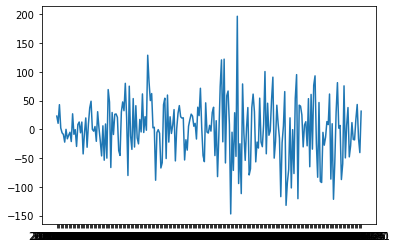

In [13]:
plt.plot(df_movements['AMZN'])

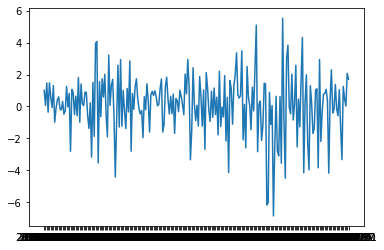

In [14]:
plt.plot(df_movements['AAPL'])

In [15]:
df_movements_cleaned = df_movements.fillna(df_movements.mean())

cleaned_movements = df_movements_cleaned.to_numpy()
cleaned_movements = cleaned_movements.astype('float64') 
cleaned_movements.shape

(232, 503)

In [16]:
np.any(np.isnan(cleaned_movements))

False

In [17]:
np.all(np.isfinite(cleaned_movements))

True

In [18]:
cur_comps = df_movements_cleaned.columns.to_list()

In [20]:
cleaned_movements.T.shape

(503, 232)

In [21]:
df_movements_cleaned.T.columns

Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
       ...
       '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23',
       '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30', '2020-12-01'],
      dtype='object', name='Date', length=232)

In [22]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(cleaned_movements.T)
X_scale = scaler.transform(cleaned_movements.T)
df_scale = pd.DataFrame(X_scale, columns=df_movements_cleaned.T.columns)
df_scale.head()

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-23,2020-11-24,2020-11-25,2020-11-27,2020-11-30,2020-12-01
0,0.052105,0.032116,0.033015,-0.008535,0.059067,-0.006962,-0.025603,-0.000449,0.010106,-0.036833,0.007412,0.007861,-0.055249,-0.033239,0.015047,-0.007636,-0.095002,-0.141941,-0.097697,0.033913,-0.075013,-0.077259,-0.056821,0.072094,-0.035935,-0.029871,-0.001348,0.032566,-0.009882,-0.045325,0.026288,-0.033540,0.005892,-0.009972,-0.031728,-0.043058,-0.146399,-0.013824,-0.024249,-0.109912,...,-0.027946,0.032103,0.009469,0.009700,-0.018938,-0.038569,0.032103,0.069979,0.023788,-0.033950,0.010393,-0.027022,0.024712,-0.048962,-0.035105,-0.080141,-0.029562,0.008545,0.037646,0.017322,0.015012,-0.059817,0.024019,-0.014781,-0.247122,0.091227,-0.035105,-0.025405,0.043188,0.028639,0.013857,-0.071596,0.024227,0.032380,0.008852,0.048454,0.006523,-0.021665,-0.070818,-0.086192
1,-0.061414,0.031194,0.061902,0.031682,-0.005849,-0.043867,-0.039480,0.005849,0.022908,-0.019984,0.020959,0.030707,0.020471,-0.064826,-0.009261,-0.039968,0.006336,0.060439,-0.004387,0.047279,-0.083835,-0.020959,0.017059,-0.062876,0.052153,0.009748,0.010236,-0.036069,0.063364,0.016572,0.040455,0.018522,0.018034,-0.000975,-0.021446,0.053616,-0.111618,-0.018034,0.025833,0.089684,...,-0.072121,-0.010303,-0.044155,0.000981,0.087330,0.026493,-0.029928,-0.032871,-0.016190,-0.107936,-0.017662,0.046609,-0.070649,0.001963,-0.012756,-0.001963,-0.057402,-0.058384,-0.084386,-0.007359,-0.015700,0.021587,-0.029437,-0.052006,0.020116,0.015700,0.009813,-0.020116,0.002453,0.035325,-0.020115,-0.071140,0.096652,0.054459,-0.049062,-0.034343,0.028456,0.021587,0.056912,-0.000491
2,-0.014613,0.026755,0.003293,0.015024,0.006792,0.013378,0.015024,0.043220,-0.037458,-0.015289,0.017355,-0.016529,0.034090,-0.016322,0.026446,-0.050205,0.028305,0.048966,-0.056197,0.017975,-0.067973,0.050825,0.052271,-0.034503,0.023966,-0.036363,0.048759,-0.025619,-0.004339,0.052271,-0.018181,0.026032,0.019008,-0.040908,-0.014462,-0.002273,-0.158673,-0.061982,-0.119005,0.006818,...,-0.067489,0.032286,-0.008957,0.059179,0.018820,-0.028021,0.011501,0.066499,0.021330,-0.083436,0.077163,0.066917,-0.103721,0.041823,-0.128187,0.000627,-0.060016,0.019448,0.034086,0.021330,0.077582,0.061061,0.012965,0.026767,0.006901,0.002091,0.037431,-0.080509,0.037431,0.022375,0.009410,-0.075909,0.035340,-0.010665,0.031158,0.054161,-0.014011,0.000836,0.000627,0.015893
3,0.032546,0.005120,0.026329,0.003291,-0.001097,0.005120,-0.052293,-0.013896,0.059125,0.046639,0.012486,0.020198,0.031950,0.039661,-0.039661,-0.016525,0.017627,-0.005876,-0.017260,0.031950,-0.073080,-0.026441,0.002938,0.025339,-0.019463,-0.049944,0.040029,0.019463,-0.028277,0.006610,0.029012,-0.019831,0.019463,-0.023503,-0.021667,-0.030113,-0.139550,-0.028277,-0.044435,-0.003305,...,-0.085519,0.013698,0.014809,0.011477,0.029617,-0.078855,-0.031944,0.017458,0.073175,-0.069089,0.000372,-0.077261,0.113663,-0.068718,0.053117,-0.011515,-0.014486,-0.051260,0.013001,0.014487,0.030459,0.050517,0.000743,0.020058,-0.089519,0.057946,0.026373,-0.017087,-0.014858,0.060174,-0.005943,-0.144865,0.037145,0.005572,-0.080233,-0.063146,-0.023773,0.035288,0.016715,-0.027859
4,-0.045774,-0.000124,0.154767,0.018805,0.003835,0.04

In [23]:
df_scale.shape

(503, 232)

Text(0, 0.5, 'Inertia')

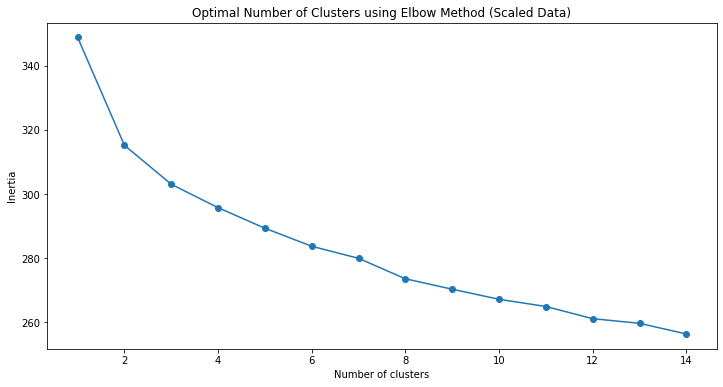

In [24]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.05764439607430033


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



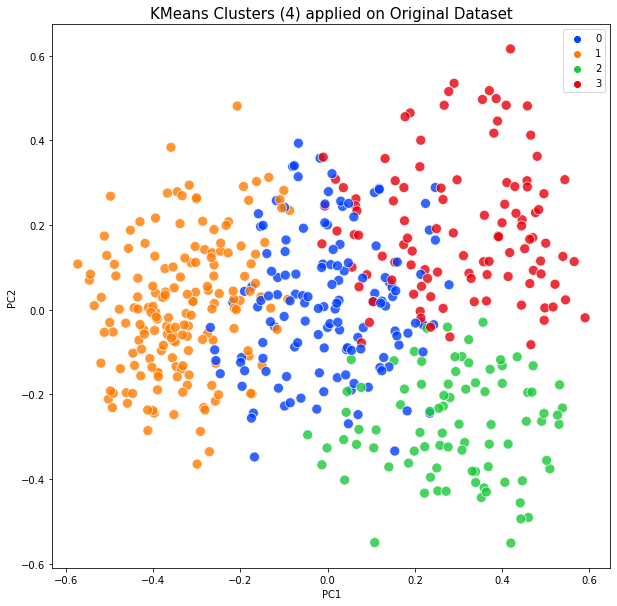

In [26]:
pca2 = PCA(n_components=4).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='bright',
                s=100, alpha=0.8).set_title('KMeans Clusters (4) applied on Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

Using PCA for Feature Reduction

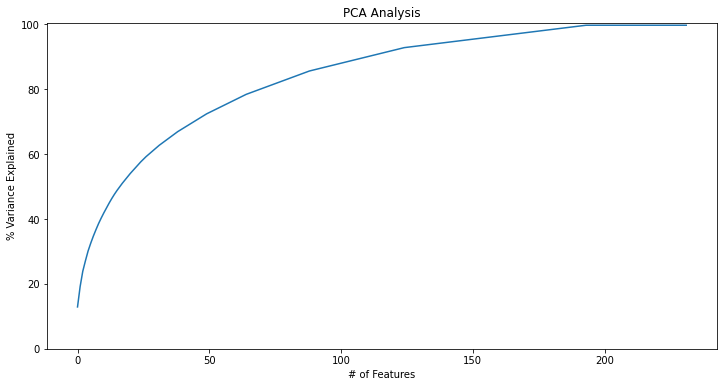

In [27]:
pca = PCA(n_components=232)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [28]:
num_comps = 80
pc_cols = []
for i in range(num_comps):
    pc_cols.append('pc'+str(i))

In [29]:
pca = PCA(n_components=num_comps)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=pc_cols)
print(pca.explained_variance_ratio_)

[0.12873112 0.06299435 0.04664255 0.03206818 0.02976612 0.0242187
 0.02164645 0.02016919 0.01906382 0.01726366 0.01596489 0.01515597
 0.01483458 0.0135104  0.01272451 0.01180263 0.01143248 0.01065096
 0.01031535 0.01014456 0.00954172 0.00937551 0.00893144 0.00855504
 0.00851205 0.00782191 0.00771894 0.00749965 0.00723362 0.00703031
 0.0068402  0.00661289 0.00630561 0.00619205 0.00604743 0.00591487
 0.00584036 0.00570603 0.00559213 0.00548827 0.00532773 0.00516701
 0.00506506 0.00504046 0.00488527 0.00487833 0.00473186 0.00465622
 0.00459432 0.00449681 0.00443166 0.00433836 0.00428616 0.00427218
 0.00418481 0.00408212 0.00402698 0.00391014 0.00380537 0.00376609
 0.00374852 0.00366089 0.00362122 0.00353444 0.00349521 0.00344428
 0.00340929 0.00338026 0.00332672 0.00323776 0.00316493 0.00315391
 0.003063   0.00302959 0.00300408 0.00298265 0.00292175 0.0028692
 0.00283811 0.00271855]


In [30]:
pca_df_scale.shape

(503, 80)

Applying KMeans to PCA reduced dataset

Text(0, 0.5, 'Inertia')

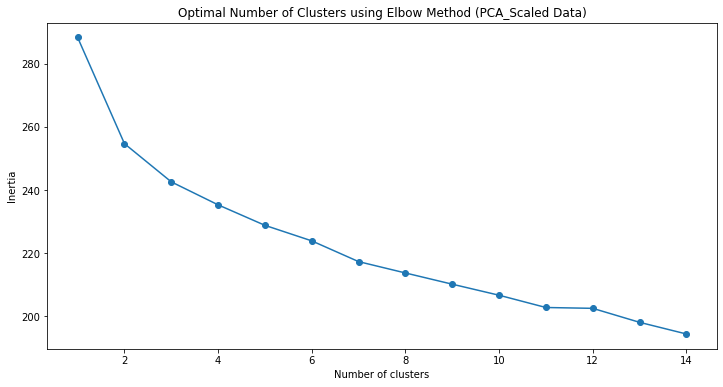

In [31]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [32]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))

labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.06894679400013617


In [33]:
clusters_pca_scale.shape

(503, 81)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



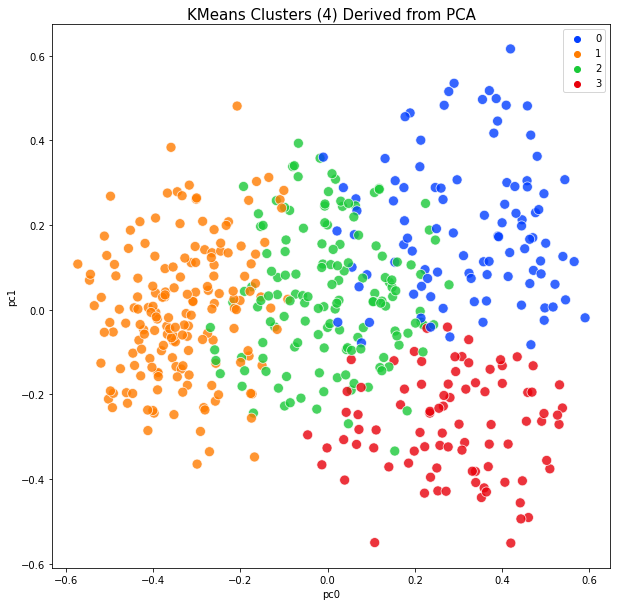

In [34]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='bright', s=100, alpha=0.8).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

Using TSNE for Feature Reduction

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 503 samples in 0.010s...
[t-SNE] Computed neighbors for 503 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 503 / 503
[t-SNE] Mean sigma: 0.346957
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.728012
[t-SNE] KL divergence after 5000 iterations: 1.565090


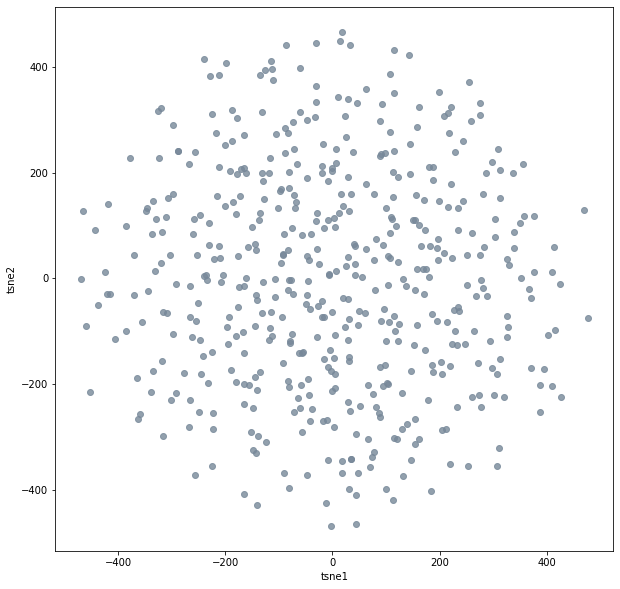

In [35]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.8, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()
# Data plot for reduced features

Text(0, 0.5, 'Inertia')

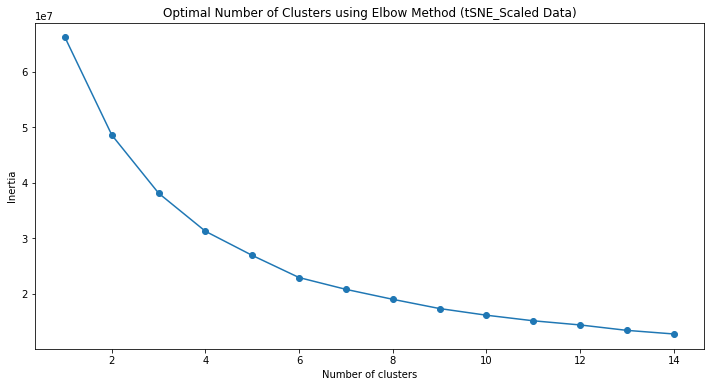

In [36]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [37]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))

labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.25078490376472473


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



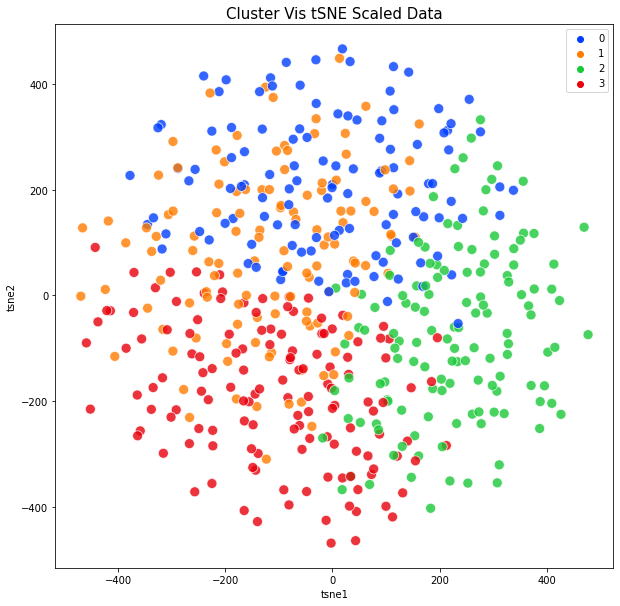

In [38]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='bright', s=100, alpha=0.8).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [39]:
companies = []
for i in cur_comps:
    companies.append(comp_dict[i])

In [40]:
clusters_tsne_scale['Companies'] = companies
clusters_tsne_scale = clusters_tsne_scale.set_index('Companies')
clusters_tsne_scale = clusters_tsne_scale[['tsne_clusters', 'tsne1', 'tsne2', 'tsne3']]
clusters_tsne_scale.head() 

,tsne_clusters,tsne1,tsne2,tsne3
Companies,,,,
3M Company,1,-297.870789,-105.489662,82.635895
Activision Blizzard,2,320.471558,-223.861343,-86.747856
Accenture plc,0,-102.598167,133.693649,-367.859131
Abbott Laboratories,2,51.919369,-240.723648,291.049194
ABIOMED Inc,2,48.990582,-60.964241,107.279472


In [41]:
clusters_pca_scale['Companies'] = companies
clusters_pca_scale = clusters_pca_scale.set_index('Companies')
clusters_pca_scale = clusters_pca_scale[['pca_clusters', 'pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30', 'pc31', 'pc32', 'pc33', 'pc34', 'pc35', 'pc36', 'pc37', 'pc38', 'pc39', 'pc40', 'pc41', 'pc42', 'pc43', 'pc44', 'pc45', 'pc46', 'pc47', 'pc48', 'pc49', 'pc50', 'pc51', 'pc52', 'pc53', 'pc54', 'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60', 'pc61', 'pc62', 'pc63', 'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70', 'pc71', 'pc72', 'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78', 'pc79']]
clusters_pca_scale.head() 

,pca_clusters,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,...,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60,pc61,pc62,pc63,pc64,pc65,pc66,pc67,pc68,pc69,pc70,pc71,pc72,pc73,pc74,pc75,pc76,pc77,pc78,pc79
Companies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3M Company,2,0.028395,0.154125,-0.145746,-0.372737,-0.042461,-0.051472,-0.049466,0.048048,-0.113825,-0.017712,-0.084864,0.106022,-0.041397,0.057821,0.037136,-0.090775,0.013157,-0.037434,-0.031557,0.034970,0.089926,0.027605,-0.052052,-0.004114,-0.042024,0.047492,-0.090093,-0.004260,0.025702,0.037064,-0.047257,-0.035728,-0.040918,-0.017406,0.030369,0.019575,-0.032164,0.001946,0.040230,...,-0.092528,-0.035493,0.085730,-0.030623,-0.052661,-0.044276,0.092402,-0.017847,-0.045127,0.046071,-0.051050,0.070500,-0.045709,0.003203,-0.009017,-0.021469,0.059845,-0.108567,0.028917,0.035449,0.022011,-0.077386,-0.092652,-0.026450,0.021273,0.040888,0.056191,0.005819,0.064793,-0.015234,0.004447,-0.005852,0.020261,-0.023712,0.051401,-0.065696,-0.088218,0.032691,0.009197,0.001913
Activision Blizzard,3,0.530425,-0.270726,-0.098357,0.453872,-0.073558,-0.118259,0.053304,-0.000822,-0.084628,-0.112216,-0.029528,0.055670,0.024125,-0.059278,-0.199735,0.041050,-0.076055,0.059237,-0.041748,-0.064589,-0.037899,-0.004901,-0.029417,-0.073672,-0.024166,0.019946,-0.064074,0.002873,-0.079134,0.047619,-0.053640,0.032076,0.020820,-0.113675,-0.005754,0.085175,-0.048495,0.026760,0.000711,...,-0.078628,0.033553,0.039948,0.008494,-0.088412,0.030015,-0.038366,0.101663,-0.062948,0.052090,-0.114458,-0.021019,0.020178,-0.094129,-0.030590,-0.059130,-0.003190,-0.060054,-0.071165,-0.060290,0.078924,-0.000123,0.000307,-0.052891,0.060725,0.033242,-0.051056,0.043066,0.038001,0.013877,0.056734,-0.034464,0.034594,-0.010654,0.004399,0.106875,-0.039797,-0.070049,-0.047285,-0.046813
Accenture plc,3,0.152197,-0.120502,-0.046029,0.052948,-0.212814,0.211610,0.055967,-0.059800,0.076670,-0.041930,-0.160513,-0.068964,-0.100660,-0.108169,0.037195,0.020785,-0.036198,-0.001472,-0.206505,-0.121063,0.084358,0.053224,0.063820,0.145314,0.084530,0.037233,0.008259,0.019448,0.024185,-0.067595,-0.022513,-0.038145,0.045336,0.047772,0.007125,0.012485,-0.005721,-0.053764,0.033323,...,0.040043,0.057545,0.028263,-0.053846,-0.017560,0.059084,0.004998,-0.032311,0.010972,-0.019111,0.022819,-0.059936,-0.083407,0.045426,0.032625,0.012152,-0.007366,-0.033333,0.050461,-0.058046,-0.043537,-0.053673,-0.010733,0.002455,-0.023283,0.019226,-0.032920,0.041568,0.006198,-0.035874,-0.051933,0.039140,-0.005786,-0.004771,0.030453,0.027117,0.067015,0.040390,-0.063103,0.040636
Abbott Laboratories,0,0.471772,0.092772,-0.164247,0.018167,-0.033386,0.168384,-0.176734,0.110607,0.043721,-0.028641,0.201134,0.091126,0.028255,0.007382,-0.040379,-0.015825,0.068155,0.036943,-0.044939,-0.059530,0.079826,-0.014001,0.009697,-0.077179,0.047099,0.024463,0.039931,0.074105,-0.168755,0.042369,-0.129697,-0.037771,-0.050661,0.103738,0.038624,0.026591,-0.086524,-0.072254,0.035180,...,0.023163,0.006350,-0.064766,-0.013816,0.014144,-0.025930,-0.108425,0.027658,-0.014513,0.095324,-0.059570,-0.066386,-0.002423,-0.063058,-0.001098,0.064931,0.086949,-0.092197,-0.040390,-0.052876,0.037085,0.065236,-0.053779,0.011041,-0.004035,0.013097,0.017706,0.021212,-0.025749,-0.031292,0.029549,-0.060268,0.011177,0.014885,-0.074291,-0.029954,0.046083,0.117881,-0.023194,0.046357
ABIOMED Inc,3,0.316784,-0.187583,-0.126214,0.095512,0.007320,0.065512,-0.259036,0.186879,-0.001530,-0.081275,0.026458,-0.047510,0.089353,-0.142232,0.051595,-0.150876,0.115687,0.009665,-0.073019,0.062152,-0.175880,0.104145,-0.091121,-0.073801,-0.002741,0.076611,0.019058,-0.069360,0.008503,-0.229946,-0.033236,-0.066902,-0.116323,0.001799,-0.001004,-0.114597,-0.143939,-0.040122,0.083893,...,-0.047570,0.098939,-

In [42]:
clusters_pca_scale.to_csv('/content/clusters_pca_scale_2020.csv')

In [43]:
clusters_tsne_scale.to_csv('/content/clusters_tsne_scale_2020.csv')